## Assignment 1: Simple Dash App

Create a dash application with the following front-end components

* A text title "Select a State to Analyze:"
* A Dropdown Menu that Contains the Options 'California', 'Oregon', and 'Washington'
* Text "State Selected: X" where X is the state selected in the Dropdown Menu

You will need to build a callback function that takes the selected state and returns output text based on the value selected in the dropdown menu. I suggest using JupyterDash to start, but you are welcome and encouraged to play with the Dash function once you have developed your application succesfully. 

In [11]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
from dash.exceptions import PreventUpdate

app = Dash(__name__)
app.layout = html.Div([
    "Select a State to Analyze",
    dcc.Dropdown(
        id = "state-input",
        options = ["California","Oregon","Washington"]
    ),
    html.Div(id = "state-output")
])

@app.callback(
    Output("state-output", "children"),
    Input("state-input", "value")
)
def update_state(state):
    if not state:
        raise PreventUpdate
    return f"State Selected: {state}"

if __name__ == "__main__":
    app.run(port = "8051", mode="inline", debug=True)


In [2]:
from jupyter_dash import JupyterDash
from dash import html, dcc
from dash.dependencies import Output, Input
from dash.exceptions import PreventUpdate

app = JupyterDash(__name__)

app.layout = html.Div(
    ["Select a State to Analyze: ",
    dcc.Dropdown(
        id="State Dropdown",
        options=["California", "Oregon", "Washington"]
     ),
     html.Div(id="text-output")
])

@app.callback(
    Output("text-output", "children"), 
    Input("State Dropdown", "value")
)
def update_output_div(state):
    if not state:
        raise PreventUpdate
    return f"State Selected: {state}"

if __name__ == "__main__":
    app.run_server(mode="inline", debug=True)

## Assignment 2: Embedding A Chart

Take the shell application we created in assignment 1 and embed the prototype plotly visual below. If the user selects 'WASHINGTON', a line chart for Washington expenditure should be plotted, and so on for each of the three states. Remove the dynamic text ouput.

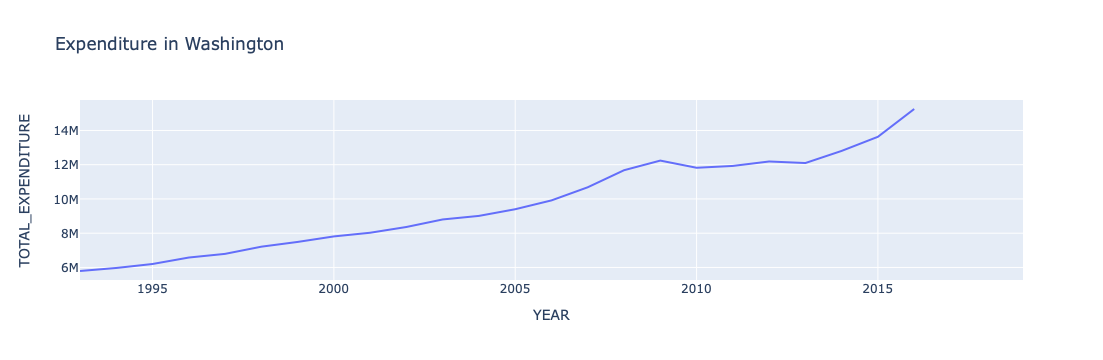

In [13]:
import pandas as pd
import plotly.express as px

education = pd.read_csv("../Data/states_all.csv", usecols=["STATE", "YEAR", "TOTAL_EXPENDITURE"])

df = education.query("STATE == 'WASHINGTON' & YEAR > 1992")

px.line(df, x="YEAR", y="TOTAL_EXPENDITURE", title="Expenditure in Washington")

In [14]:
education

STATE  YEAR  TOTAL_EXPENDITURE
0           ALABAMA  1992          2653798.0
1            ALASKA  1992           972488.0
2           ARIZONA  1992          3401580.0
3          ARKANSAS  1992          1743022.0
4        CALIFORNIA  1992         27138832.0
...             ...   ...                ...
1710       VIRGINIA  2019                NaN
1711     WASHINGTON  2019                NaN
1712  WEST_VIRGINIA  2019                NaN
1713      WISCONSIN  2019                NaN
1714        WYOMING  2019                NaN

[1715 rows x 3 columns]

In [20]:
from dash import Dash, html, dcc
from dash.dependencies import Output, Input
from dash.exceptions import PreventUpdate
import plotly.graph_objects as go

import plotly.express as px
import pandas as pd

df = pd.read_csv("../Data/states_all.csv", usecols=["STATE", "YEAR", "TOTAL_EXPENDITURE"])

app = Dash(__name__)

app.layout = html.Div(
    ["Select a State to Analyze: ",
    dcc.Dropdown(
        id="State Dropdown",
        options=["California", "Oregon", "Washington"]
     ),
     dcc.Graph(
        id="visual",
        figure=go.Figure().update_layout(
            title="Expenditure in [Select a State]",
            xaxis_title="YEAR",
            yaxis_title="TOTAL_EXPENDITURE"
        )
     )
])

@app.callback(
    Output("visual", "figure"), 
    Input("State Dropdown", "value")
)
def update_output_div(state):
    if not state:
        raise PreventUpdate
    figure = px.line(
        df.query(f"STATE == '{state.upper()}' & YEAR > 1992"), 
        x="YEAR", 
        y="TOTAL_EXPENDITURE", 
        title=f"Expenditure in {state}"
    ) 
    return figure

if __name__ == "__main__":
    app.run(mode="inline", debug=True, port=8765)